In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [16]:
img_height = 180
img_width = 180

In [17]:
data_train_path = 'train'
data_test_path = 'test'
data_validation_path = 'valid'

In [18]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False
)

Found 84635 files belonging to 525 classes.


In [19]:
class_names = data_train.class_names
class_names

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN DIPPER',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'AMERICAN ROBIN',
 'AMERICAN WIGEON',
 'AMETHYST WOODSTAR',
 'ANDEAN GOOSE',
 'ANDEAN LAPWING',
 'ANDEAN SISKIN',
 'ANHINGA',
 'ANIANIAU',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ANTILLEAN EUPHONIA',
 'APAPANE',
 'APOSTLEBIRD',
 'ARARIPE MANAKIN',
 'ASHY STORM PETREL',
 'ASHY THRUSHBIRD',
 'ASIAN CRESTED IBIS',
 'ASIAN DOLLARD BIRD',
 'ASIAN GREEN BEE EATER',
 'ASIAN OPENBILL STORK',
 'AUCKLAND SHAQ',
 'AUSTRAL CANASTERO',
 'AUSTRALASIAN FIGBIRD',
 'AVADAVAT',
 'AZARAS SPINETAIL',
 'AZURE 

In [20]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = True,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False
)

Found 2625 files belonging to 525 classes.


In [21]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle = True,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False
)

Found 2625 files belonging to 525 classes.


2024-03-28 21:49:26.731789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [84635]
	 [[{{node Placeholder/_4}}]]
2024-03-28 21:49:26.732132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [84635]
	 [[{{node Placeholder/_0}}]]


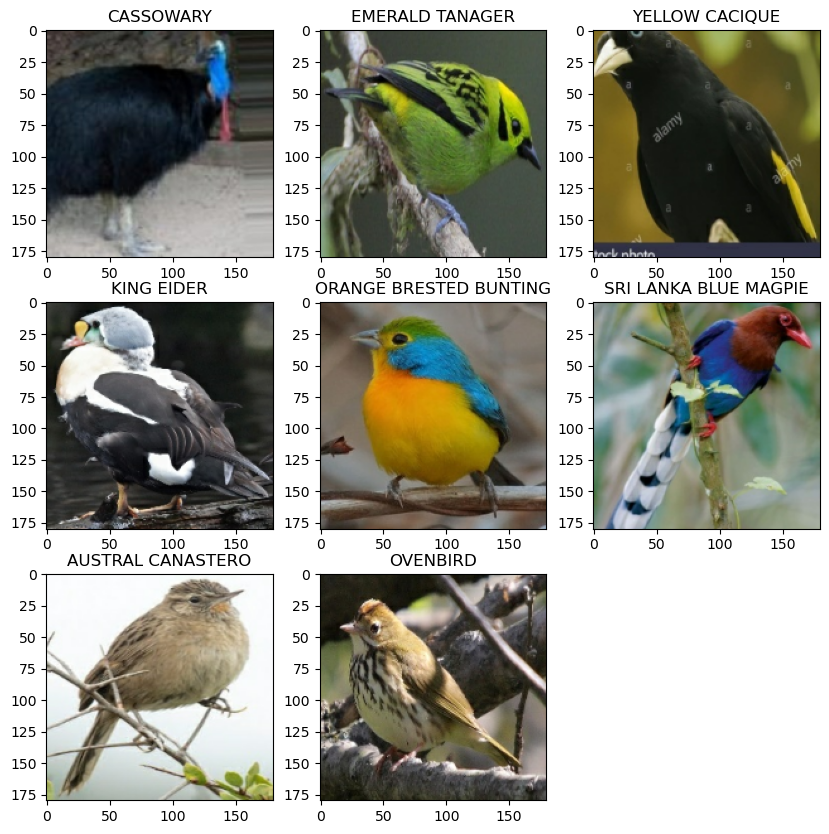

In [22]:
count = 0
plt.figure(figsize=(10,10))
for image, labels in data_train:
    plt.subplot(3,3,count+1)
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.title(class_names[labels[0]])
    count+=1
    if count == 8:
        break

In [23]:
tf.__version__

'2.12.0'

In [24]:
tf.test.is_built_with_cuda()

False

In [25]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [26]:
# # X_train = np.concatenate(images for images, _ in data_train)

# image_list = []

# # Iterate through the dataset and extract the images
# for images, _ in data_train:
#     image_list.append(images.numpy())  # Convert the TensorFlow tensor to a NumPy array

# # Concatenate the images from all batches into a single array
# X_train = np.concatenate(image_list, axis=0)

# # Print the shape of the concatenated array
# print("X_train shape:", X_train.shape)

In [27]:
# X_train.shape

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation using ImageDataGenerator
data_augmentation = ImageDataGenerator(
    # rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [15]:
# # Prepare the data for augmentation
# augmented_images = []
# augmented_labels = []

# # Generate augmented data and append to lists
# for images, labels in data_train:
#     augmented_batch = data_augmentation.flow(images, labels, batch_size=32)
#     augmented_images.append(augmented_batch[0][0])  # Get the first augmented batch
#     augmented_labels.append(augmented_batch[0][1])  # Corresponding labels

# # Convert lists to NumPy arrays
# augmented_images_np = np.concatenate(augmented_images, axis=0)
# augmented_labels_np = np.concatenate(augmented_labels, axis=0)

# print(augmented_images_np.shape)
# print(augmented_labels_np.shape)

In [28]:
from tensorflow.keras.models import Sequential

In [17]:
model = Sequential([
    layers.Rescaling(1./255),
    # layers.RandomFlip("horizontal_and_vertical"),
    # layers.RandomRotation(0.2),
    # layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3)),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.50),
    layers.Dense(512,activation='relu'),
    layers.Dense(525)
])

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [19]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    model_data = model.fit(data_train,validation_data=data_val,epochs = 10)

Epoch 1/10
 213/2645 [=>............................] - ETA: 34:45 - loss: 6.4814 - accuracy: 0.0026

KeyboardInterrupt: 

In [79]:
model.evaluate(data_test)

 2/83 [..............................] - ETA: 6s - loss: 4.2445 - accuracy: 0.5312

2024-03-24 23:23:44.191877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2625]
	 [[{{node Placeholder/_4}}]]
2024-03-24 23:23:44.192257: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2625]
	 [[{{node Placeholder/_4}}]]


83/83 [==============================] - 9s 106ms/step - loss: 3.3212 - accuracy: 0.5550


[3.321195363998413, 0.5550476312637329]

In [80]:
y_pred = model.predict(data_test)
y_pred

83/83 [==============================] - 9s 107ms/step


array([[-23.238308, -42.840824, -41.05202 , ..., -35.44145 , -52.309517,
        -61.7728  ],
       [-20.591326, -35.53152 , -36.930695, ..., -52.77849 , -45.50533 ,
        -26.559673],
       [-23.412401, -40.338394, -47.400684, ..., -52.95767 , -54.298843,
        -42.941708],
       ...,
       [-70.97158 , -50.7346  , -74.141785, ..., -80.42674 , -96.046265,
        -32.24641 ],
       [-31.278961, -43.28072 , -65.95767 , ..., -84.855484, -56.524117,
        -41.10235 ],
       [-31.129736, -30.193087, -43.441967, ..., -61.802383, -67.16039 ,
        -19.171354]], dtype=float32)

In [82]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes

[183,
 138,
 412,
 218,
 0,
 185,
 151,
 479,
 1,
 1,
 54,
 115,
 2,
 412,
 180,
 2,
 373,
 2,
 334,
 117,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 307,
 5,
 392,
 6,
 6,
 375,
 6,
 6,
 168,
 7,
 386,
 364,
 7,
 8,
 8,
 8,
 8,
 188,
 346,
 9,
 9,
 357,
 9,
 289,
 10,
 10,
 10,
 10,
 11,
 11,
 423,
 11,
 11,
 465,
 12,
 502,
 162,
 174,
 13,
 33,
 156,
 23,
 362,
 14,
 165,
 14,
 14,
 14,
 99,
 15,
 15,
 447,
 15,
 16,
 334,
 16,
 16,
 16,
 180,
 17,
 342,
 238,
 17,
 443,
 18,
 18,
 18,
 18,
 481,
 19,
 215,
 215,
 215,
 52,
 164,
 8,
 91,
 513,
 21,
 44,
 21,
 289,
 250,
 22,
 22,
 148,
 405,
 520,
 23,
 23,
 23,
 23,
 23,
 334,
 24,
 494,
 364,
 193,
 333,
 25,
 70,
 333,
 25,
 26,
 26,
 26,
 26,
 296,
 158,
 27,
 27,
 27,
 27,
 159,
 289,
 219,
 28,
 28,
 231,
 29,
 29,
 231,
 29,
 30,
 200,
 125,
 125,
 30,
 31,
 31,
 25,
 495,
 31,
 281,
 287,
 32,
 97,
 325,
 491,
 33,
 33,
 106,
 96,
 307,
 282,
 445,
 142,
 444,
 35,
 35,
 51,
 212,
 342,
 36,
 36,
 36,
 433,
 36,
 37,
 211,
 122,
 378,
 3

In [84]:
labels_all = np.concatenate([labels for _, labels in data_test], axis=0)

In [85]:
labels_all

array([  0,   0,   0, ..., 524, 524, 524], dtype=int32)

In [86]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(labels_all, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.25      0.40      0.31         5
           2       0.09      0.20      0.13         5
           3       0.00      0.00      0.00         5
           4       0.56      1.00      0.71         5
           5       0.50      0.60      0.55         5
           6       0.67      0.80      0.73         5
           7       0.40      0.40      0.40         5
           8       0.80      0.80      0.80         5
           9       0.25      0.60      0.35         5
          10       0.80      0.80      0.80         5
          11       0.80      0.80      0.80         5
          12       0.25      0.20      0.22         5
          13       0.25      0.20      0.22         5
          14       0.57      0.80      0.67         5
          15       0.33      0.60      0.43         5
          16       0.80      0.80      0.80         5
  

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
import tensorflow_hub as hub

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

In [29]:
len(class_names)

525

In [30]:
model1 = Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(len(class_names))
])

In [31]:
model1.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [32]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 525)               672525    
                                                                 
Total params: 2,930,509
Trainable params: 672,525
Non-trainable params: 2,257,984
_________________________________________________________________


In [34]:
model_data1 = model1.fit(data_train,validation_data=data_val,epochs = 15)

Epoch 1/15
2645/2645 [==============================] - ETA: 0s - loss: 5.3733 - acc: 0.0731

2024-03-25 14:52:30.133877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2625]
	 [[{{node Placeholder/_0}}]]
2024-03-25 14:52:30.134267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2625]
	 [[{{node Placeholder/_0}}]]


2645/2645 [==============================] - 927s 351ms/step - loss: 5.3733 - acc: 0.0731 - val_loss: 4.7741 - val_acc: 0.1307
Epoch 2/15
2645/2645 [==============================] - 926s 350ms/step - loss: 4.3322 - acc: 0.1743 - val_loss: 4.4884 - val_acc: 0.1653
Epoch 3/15
2645/2645 [==============================] - 934s 353ms/step - loss: 3.8691 - acc: 0.2382 - val_loss: 4.3537 - val_acc: 0.1775
Epoch 4/15
2645/2645 [==============================] - 976s 369ms/step - loss: 3.5500 - acc: 0.2841 - val_loss: 4.2639 - val_acc: 0.1924
Epoch 5/15
2645/2645 [==============================] - 942s 356ms/step - loss: 3.3022 - acc: 0.3231 - val_loss: 4.2266 - val_acc: 0.2069
Epoch 6/15
2645/2645 [==============================] - 859s 325ms/step - loss: 3.0958 - acc: 0.3590 - val_loss: 4.1725 - val_acc: 0.2236
Epoch 7/15
2645/2645 [==============================] - 594s 225ms/step - loss: 2.9238 - acc: 0.3879 - val_loss: 4.1698 - val_acc: 0.2282
Epoch 8/15
1208/2645 [============>..........

KeyboardInterrupt: 

In [34]:
from tensorflow.keras import models, optimizers, losses

model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
for layer in model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(model.output)
x = layers.Dense(2048, activation='swish')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(525, activation='softmax')(x)

model = models.Model(inputs=model.input, outputs=outputs)

model.compile(optimizer=optimizers.legacy.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# history = model.fit(
#     augmented_images_np,
#     augmented_labels_np,
#     validation_data=(val_images_np_rescaled,val_labels_np),
#     epochs = 10)

history = model.fit(data_train, epochs=10, validation_data=data_val)

# test_loss, test_acc = model.evaluate(test_data)
# print(f'Test Accuracy: {test_acc * 100}%')

Epoch 1/10
2645/2645 [==============================] - ETA: 0s - loss: 0.9700 - accuracy: 0.7706

2024-03-28 22:08:56.102708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2625]
	 [[{{node Placeholder/_4}}]]
2024-03-28 22:08:56.103070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2625]
	 [[{{node Placeholder/_4}}]]


2645/2645 [==============================] - 928s 350ms/step - loss: 0.9700 - accuracy: 0.7706 - val_loss: 0.3447 - val_accuracy: 0.9090
Epoch 2/10
2645/2645 [==============================] - 1266s 479ms/step - loss: 0.4585 - accuracy: 0.8827 - val_loss: 0.3323 - val_accuracy: 0.9223
Epoch 3/10
 187/2645 [=>............................] - ETA: 18:59 - loss: 0.3693 - accuracy: 0.9044

KeyboardInterrupt: 

In [35]:
model.fit(data_test)

2024-03-28 22:32:19.718963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2625]
	 [[{{node Placeholder/_0}}]]
2024-03-28 22:32:19.719456: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2625]
	 [[{{node Placeholder/_4}}]]


83/83 [==============================] - 35s 417ms/step - loss: 0.3157 - accuracy: 0.9177
